In [9]:
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

all_data = pd.read_csv(r'C:\Users\Vincelot\Documents\GitHub\Digital_Addiction\Data\submission_and_comments_V3.csv', sep = ";")
data = all_data[(all_data.submission_title != "[deleted by user]") & ~(all_data.submission_title.isna())]
np.mean(np.logical_or((all_data.submission_title == "[deleted by user]") , (all_data.submission_title.isna())))

0.07356726730795285

In [2]:
vectorizer = TfidfVectorizer(max_df=0.95)  # ignore words with very high doc frequency
tf_idf = vectorizer.fit_transform(data['submission_title'])
words = vectorizer.get_feature_names_out()

tf_idf = csr_matrix(tf_idf)
tf_idf.shape


(20514, 10340)

In [3]:
from sklearn.preprocessing import normalize
tf_idf = normalize(tf_idf)
tf_idf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(tf_idf.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
# fit the model
kmeans.fit(tf_idf)
# store cluster labels in a variable
clusters = kmeans.labels_

C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


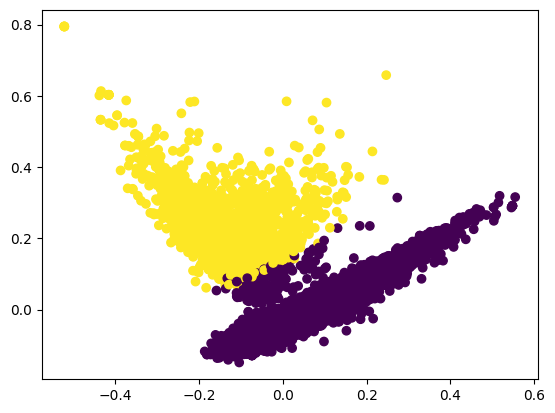

In [37]:
plt.scatter(x0, x1, c=clusters)

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(np.asarray(tf_idf.todense()))
z0, z1 = z[:,0], z[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20514 samples in 0.294s...
[t-SNE] Computed neighbors for 20514 samples in 68.712s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20514
[t-SNE] Computed conditional probabilities for sample 2000 / 20514
[t-SNE] Computed conditional probabilities for sample 3000 / 20514
[t-SNE] Computed conditional probabilities for sample 4000 / 20514
[t-SNE] Computed conditional probabilities for sample 5000 / 20514
[t-SNE] Computed conditional probabilities for sample 6000 / 20514
[t-SNE] Computed conditional probabilities for sample 7000 / 20514
[t-SNE] Computed conditional probabilities for sample 8000 / 20514
[t-SNE] Computed conditional probabilities for sample 9000 / 20514
[t-SNE] Computed conditional probabilities for sample 10000 / 20514
[t-SNE] Computed conditional probabilities for sample 11000 / 20514
[t-SNE] Computed conditional probabilities for sample 12000 / 20514
[t-SNE] Computed conditional probabilities for sa

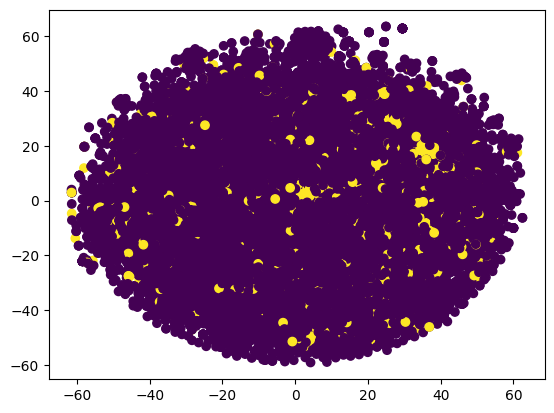

In [44]:
plt.scatter(z0, z1, c=clusters)

In [49]:
import umap.umap_ as umap

reducer = umap.UMAP(verbose = True)
emb = reducer.fit_transform(tf_idf)

UMAP( verbose=True)
Sat May 13 23:43:13 2023 Construct fuzzy simplicial set
Sat May 13 23:43:13 2023 Finding Nearest Neighbors
Sat May 13 23:43:13 2023 Building RP forest with 12 trees
Sat May 13 23:43:16 2023 metric NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	 9  /  14
	Stopping threshold met -- exiting after 9 iterations
Sat May 13 23:44:27 2023 Finished Nearest Neighbor Search
Sat May 13 23:44:31 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:13]

Sat May 13 23:44:45 2023 Finished embedding


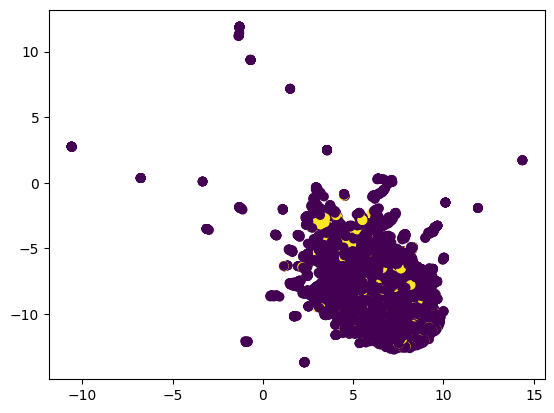

In [51]:
plt.scatter(emb[:,0], emb[:,1], c=clusters)

In [10]:
Sum_of_squared_distances = []
K = tqdm.trange(1,1001, 100)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tf_idf)
    Sum_of_squared_distances.append(kmeans.inertia_)

100%|██████████| 10/10 [24:32<00:00, 147.28s/it]


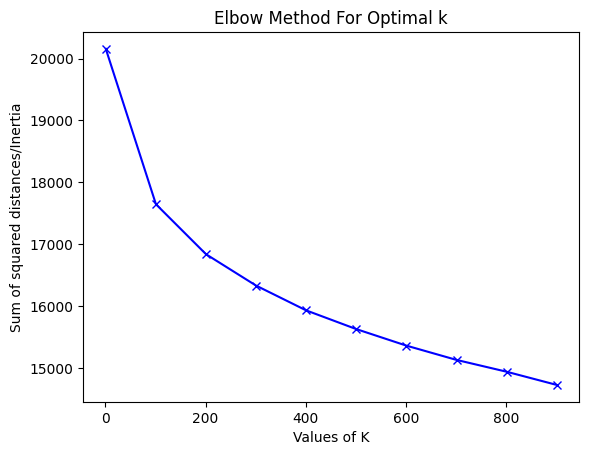

In [12]:
plt.plot(range(1,1001, 100),Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [14]:
silhouette_avg = []
for num_clusters in tqdm.trange(1,101, 10):
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tf_idf)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(tf_idf, cluster_labels))

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  0%|          | 0/10 [00:01<?, ?it/s]


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
plt.plot(rangee(1,100),silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()